In [2]:
import sys, platform, os
import numpy as np
import camb
import pandas as pd
import healpy as hp
from camb import model, initialpower
import useful_functions as uf
import pysm3
from fgbuster import (CMB, Dust, Synchrotron, basic_comp_sep,get_observation, get_instrument, get_sky)
from fgbuster.visualization import corner_norm
nside_patch = 16
nside=16
nside_compsep=nside_patch

instrument = get_instrument('LiteBIRD')
kind_of_map='d1s1'

#sky_vary = get_sky(NSIDE_PATCH, kind_of_map)
sky_vary = get_sky(nside, kind_of_map)

for spectral_param in [sky_vary.components[0].mbb_index,
                       sky_vary.components[0].mbb_temperature,
                       sky_vary.components[1].pl_index]:
    spectral_param[:] = hp.ud_grade(hp.ud_grade(spectral_param.value, nside_patch),
                                    nside) * spectral_param.unit
    print(spectral_param.unit)

unit=-3 #uk->mk 
sync_freq_maps = get_observation(instrument, sky_vary, noise=False, nside=nside,unit='mK_CMB') #, unit='uK_CMB')
home_dir="/home/amorelli/foreground_noise_maps/"
np.savez(home_dir+kind_of_map+"_file",sync_freq_maps=sync_freq_maps)

/home/amorelli/fgbuster/fgbuster/observation_helpers.py:97: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  return df.dropna(1, 'all')



K



In [12]:
#print(sync_freq_maps)

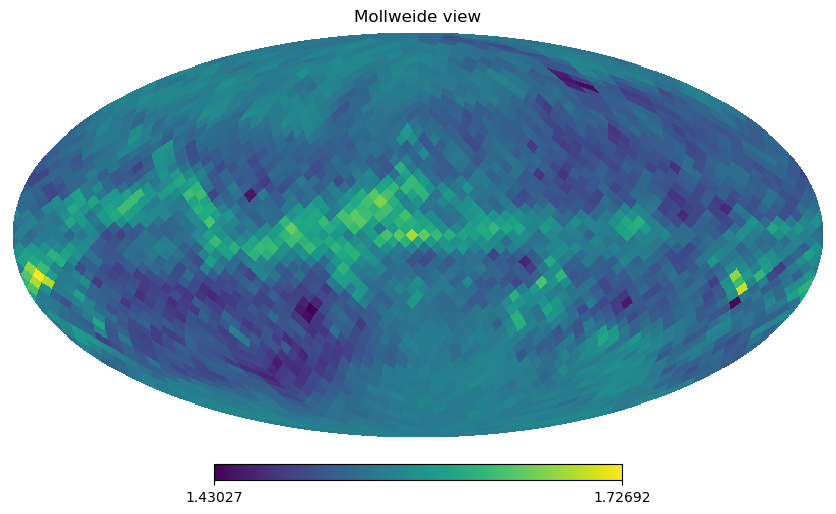

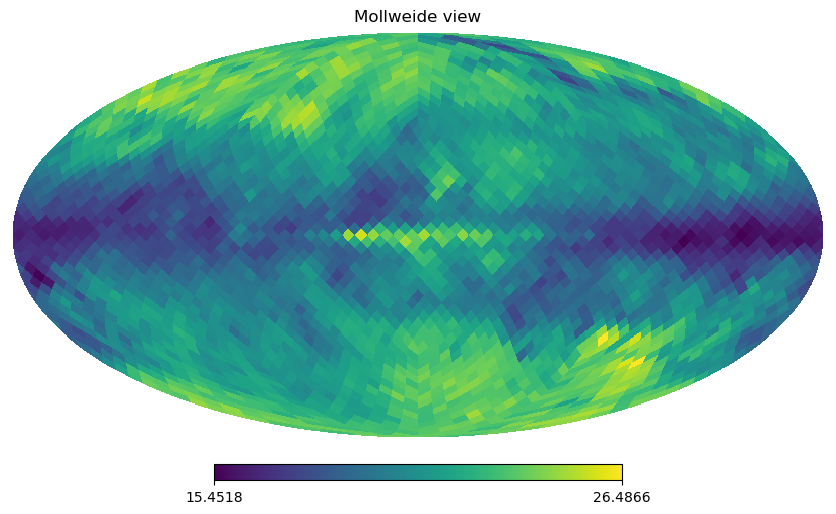

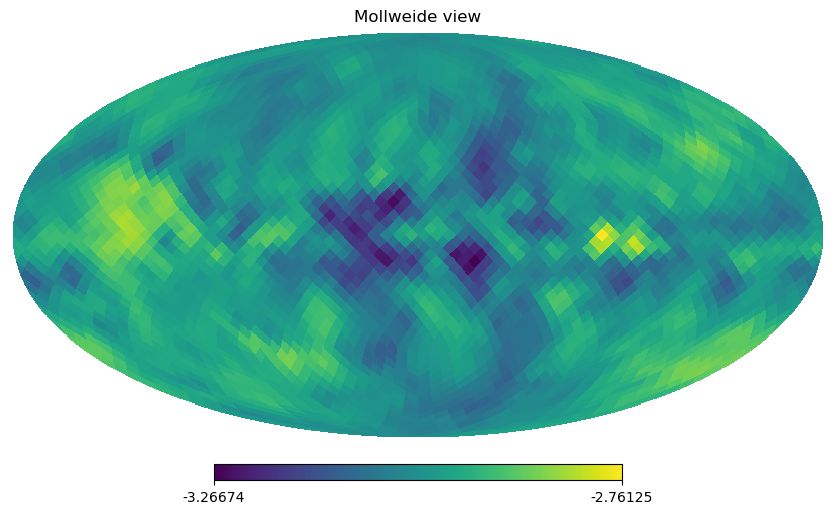

In [7]:
hp.mollview(sky_vary.components[0].mbb_index)#,sub=(1,3,1))
hp.mollview(sky_vary.components[0].mbb_temperature)#,sub=(1,3,2))
hp.mollview(sky_vary.components[1].pl_index)#,sub=(1,3,3))

In [ ]:
#hp.mollview(sync_freq_maps)

In [3]:
print(help(get_sky))

Help on function get_sky in module fgbuster.observation_helpers:

get_sky(nside, tag='c1d0s0')
    Get a pre-defined PySM sky
    
    Parameters
    ----------
    nside: int
        healpix nside of the sky templates
    tag: string
        See the `pysm documentation
        <https://pysm3.readthedocs.io/en/latest/models.html#models>`_
        for a complete list of available options.
        Default is 'c1d0s0', i.e. cmb (c1), dust with constant temperature and
        spectral index (d0), and synchrotron with constant spectral index (s0).
    
    Returns
    -------
    sky: pysm3.Sky
        See the `pysm documentation
        <https://pysm3.readthedocs.io/en/latest/api/pysm.Sky.html#pysm.Sky>`_

None
